<a href="https://colab.research.google.com/github/DarshikaKhandelwal/Cyclones/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
# import TensorFlow
import tensorflow as tf

#Check the version of TensorFlow you are using
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.12.0
[]


In [ ]:
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
gpus

[]

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr

In [ ]:
image_exts = ['jpeg','jpg','png','bmp','gif','svg']

In [ ]:
# import shutil
# data_dir = 'data'
# filtered_dir = 'filtered_data'

# # Create a filtered version of data_dir without the '.ipynb_checkpoints' folder
# if not os.path.exists(filtered_dir):
#     os.makedirs(filtered_dir)

# for item in os.listdir(data_dir):
#     if item != '.ipynb_checkpoints':
#         item_path = os.path.join(data_dir, item)
#         filtered_item_path = os.path.join(filtered_dir, item)
#         shutil.copytree(item_path, filtered_item_path)

In [ ]:
for image_class in os.listdir(filtered_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(filtered_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)   # returns the type of the image.
      if tip not in image_exts:
        print("Image not in ext list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))

format of the ndarray

(rows, cols, channels)

3 channels mean it is a coloured image

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
 tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [ ]:
import numpy as np

In [ ]:
# tf.data.Dataset??
# it allows you build data pipelines
# gives a repeatable set of steps that you will be applying to your data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(filtered_dir)

Found 843 files belonging to 2 classes.


In [ ]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

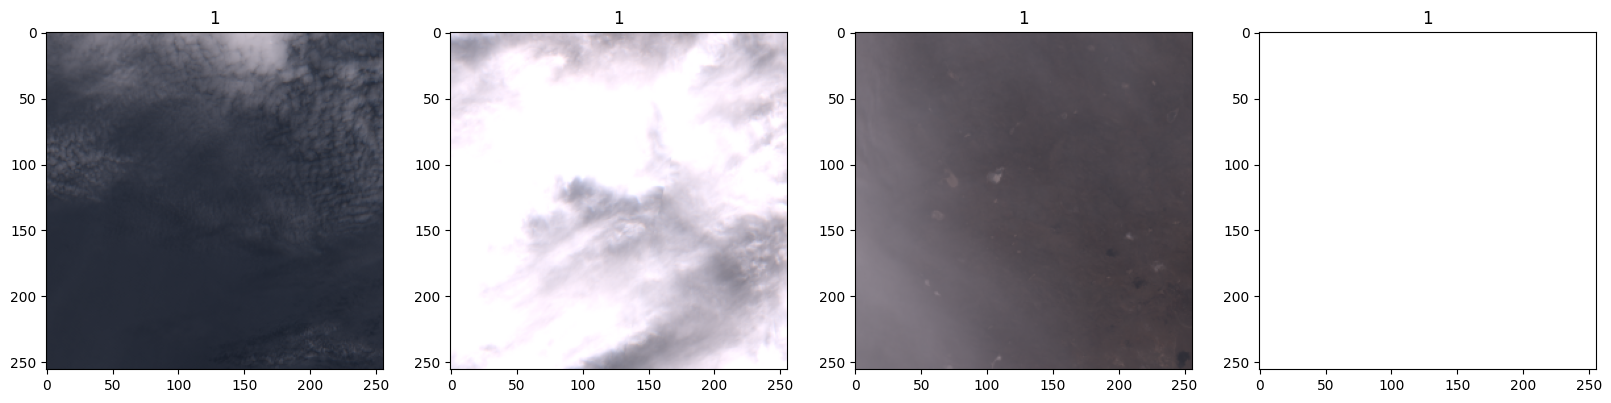

In [ ]:
scaled_data = data.map(lambda x,y: (x/255, y))

scaled_iterator = scaled_data.as_numpy_iterator()

batch = scaled_iterator.next()

# we are using matplotlib's subplot function to print 4 images at a particular time
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

27

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
a = model.summary()
a

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 64)      

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs = 100, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/100
18/18 [==============================] - 82s 4s/step - loss: 79.9476 - accuracy: 0.5903 - val_loss: 0.9392 - val_accuracy: 0.6250
Epoch 2/100
18/18 [==============================] - 65s 4s/step - loss: 0.3982 - accuracy: 0.8490 - val_loss: 0.2076 - val_accuracy: 0.9187
Epoch 3/100
18/18 [==============================] - 64s 3s/step - loss: 0.2871 - accuracy: 0.8854 - val_loss: 0.1710 - val_accuracy: 0.9187
Epoch 4/100
18/18 [==============================] - 64s 4s/step - loss: 0.2375 - accuracy: 0.9028 - val_loss: 0.2268 - val_accuracy: 0.9125
Epoch 5/100
18/18 [==============================] - 63s 3s/step - loss: 0.1900 - accuracy: 0.9253 - val_loss: 0.1695 - val_accuracy: 0.9312
Epoch 6/100
18/18 [==============================] - 63s 3s/step - loss: 0.1450 - accuracy: 0.9514 - val_loss: 0.1058 - val_accuracy: 0.9563
Epoch 7/100
18/18 [==============================] - 73s 4s/step - loss: 0.1070 - accuracy: 0.9549 - val_loss: 0.1299 - val_accuracy: 0.9563
Epoch 8/100


EPOCH -- the number of passes a training dataset takes around an algorithm

In [ ]:
hist.history

{'loss': [79.94760131835938,
  0.39824187755584717,
  0.2871343791484833,
  0.23754484951496124,
  0.18999570608139038,
  0.14495043456554413,
  0.10704172402620316,
  0.09733199328184128,
  0.08205530047416687,
  0.07874539494514465,
  0.06965640932321548,
  0.13351672887802124,
  0.1828443855047226,
  0.15087167918682098,
  0.10623166710138321,
  0.06974386423826218,
  0.09405463188886642,
  0.08193164318799973,
  0.05210132151842117,
  0.05688706412911415,
  0.04818667471408844,
  0.05358090624213219,
  0.062104541808366776,
  0.0622139498591423,
  0.0821891501545906,
  0.06146881356835365,
  0.07429943978786469,
  0.05623848736286163,
  0.052975378930568695,
  0.05549032986164093,
  0.056934695690870285,
  0.04999997466802597,
  0.05210370197892189,
  0.03642721846699715,
  0.03649686649441719,
  0.03749515116214752,
  0.03188161551952362,
  0.02894221805036068,
  0.037888918071985245,
  0.03951752558350563,
  0.045191846787929535,
  0.042402032762765884,
  0.032942261546850204,
  

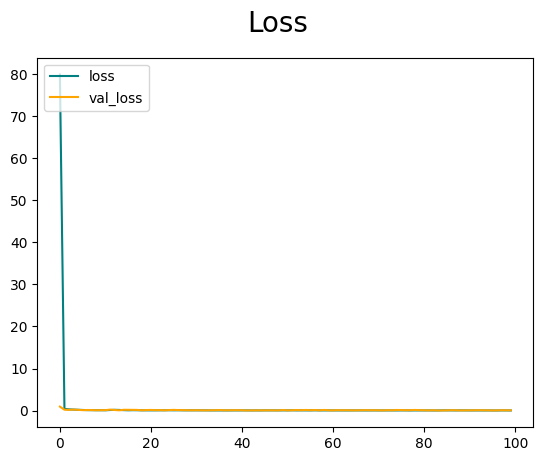

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

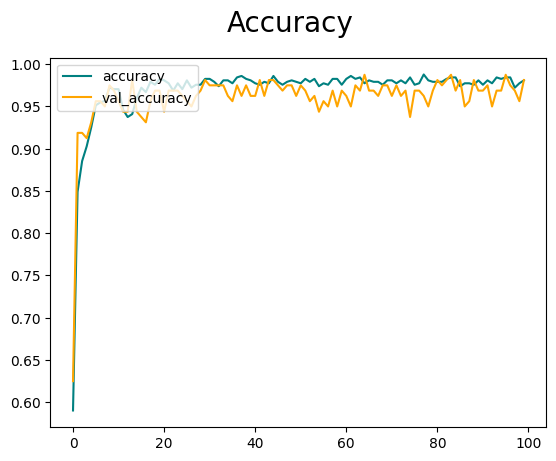

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

2

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 725ms/step


In [ ]:
yhat

array([[2.7142072e-03],
       [9.9999613e-01],
       [9.9999934e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.3132620e-06],
       [9.9902105e-01],
       [1.0000000e+00],
       [2.3041642e-04],
       [1.0000000e+00],
       [1.0000000e+00],
       [3.7655778e-02],
       [9.9999881e-01],
       [2.4363602e-04],
       [4.1704334e-04],
       [4.0074680e-03],
       [6.3723665e-01],
       [1.0000000e+00],
       [9.1547286e-04],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.4482988e-06],
       [8.9069636e-04],
       [9.9999988e-01],
       [1.0744687e-02],
       [9.9130696e-01],
       [9.9994236e-01],
       [5.3272182e-05],
       [1.0000000e+00]], dtype=float32)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9782609, shape=(), dtype=float32) tf.Tensor(0.9782609, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/filtered_data/cyclones/20190502.00.Indian.IRImage.png.png')

In [ ]:
img2 = cv2.imread('/content/data/cyclones/20190502.00.Indian.IRImage.png.png')

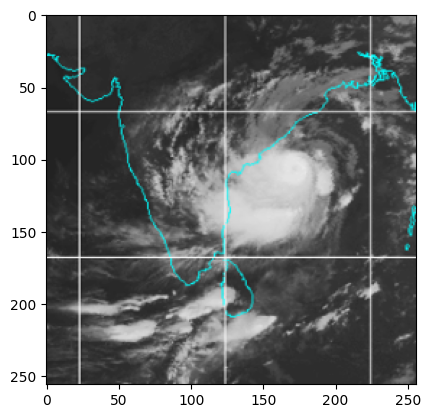

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 125ms/step


In [ ]:
# rounded_yhat = np.around(yhat, 2)
# rounded_yhat
yhat

array([[0.9062752]], dtype=float32)

In [ ]:
if yhat >= 0.61:
  print("No Cyclone")
else:
  print("Cyclone")

No Cyclone


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','cyclonedetectionCNN.h5'))